<h1><span style="color: #993300;">Python Class Project #2</span></h1>
<h2><span style="color: #993300;">The Lotto Winning Number Analysis</span></h2>
<p><span style="color: #0000ff;">[Project Description]&nbsp;</span></p>
<p><span style="color: #000000;">In this class project, we analyze the winning numbers of lotto games.&nbsp;There are over the 700 games and 6 winning numbers at each game. We can search and find a lot of lotto number recommending on-line sites. They are using their own recommending algorithms. For example,&nbsp;</span></p>
<ul>
<li><span style="color: #000000;">The accumulated &nbsp;frequency of the each number in total games</span></li>
<li><span style="color: #000000;">The accumulated &nbsp;frequency of the each number in the last N games</span></li>
<li><span style="color: #000000;">What is the most frequently used number ?</span></li>
<li><span style="color: #000000;">What is the least frequently used number ?</span></li>
<li><span style="color: #000000;">What is the most/least frequently used number in the last N weeks?</span></li>
<li><span style="color: #000000;">How is the average gap between max and min number?</span></li>
<li><span style="color: #000000;">Random 6 numbers that are satisfied with&nbsp;</span>
<ul>
<li><span style="color: #000000;">Max - Min &lt; average of gap</span></li>
<li><span style="color: #000000;">in the top N of the accumulated frequency</span></li>
<li><span style="color: #000000;">not in the least M of accumulated frequency</span></li>
</ul>
</li>
</ul>
<p><span style="color: #000000;">&nbsp;</span></p>

<h2><span style="color: #993300;">Pandas</span></h2>
<ul>
<li class="nav-item nav-item-0"><a href="http://pandas.pydata.org/pandas-docs/stable/index.html">pandas 0.19.2 documentation</a> &raquo;</li>
</ul>
<img src="http://www.clipular.com/c/5725045629648896.png?k=x2OJ_Y1gT74aYebqP4XbbS4yPQA" >

<h2>&nbsp;<a href="https://github.com/dblabsju/05979-01-Python/blob/master/Panda%20Intro.ipynb">Introduction Pandas </a></h2>

<h2><span style="color: #993300;">Getting Winning Numbers from a CSV File </span></h2>

<h3>CSV File Reading and Writing</h3>
<p>&nbsp;</p>
<p>CSV (Comma Separated Values) format is the most common import and export format for spreadsheets and databases.</p>
<p>&nbsp;</p>
<p><code class="descclassname">csv.</code><code class="descname">reader</code><span class="sig-paren">(</span><em>csvfile</em>, <em>dialect='excel'</em>, <em>**fmtparams</em><span class="sig-paren">)</span></p>
<p>A short usage example:</p>
<div class="highlight-python">
<div class="highlight"><span class="copybutton" title="Hide the prompts and output">&gt;&gt;&gt;</span>
<pre><span class="gp">&gt;&gt;&gt; </span><span class="kn">import</span> <span class="nn">csv</span>
<span class="gp">&gt;&gt;&gt; </span><span class="k">with</span> <span class="nb">open</span><span class="p">(</span><span class="s1">'eggs.csv'</span><span class="p">,</span> <span class="s1">'rb'</span><span class="p">)</span> <span class="k">as</span> <span class="n">csvfile</span><span class="p">:</span>
<span class="gp">... </span>    <span class="n">spamreader</span> <span class="o">=</span> <span class="n">csv</span><span class="o">.</span><span class="n">reader</span><span class="p">(</span><span class="n">csvfile</span><span class="p">,</span> <span class="n">delimiter</span><span class="o">=</span><span class="s1">' '</span><span class="p">,</span> <span class="n">quotechar</span><span class="o">=</span><span class="s1">'|'</span><span class="p">)</span>
<span class="gp">... </span>    <span class="k">for</span> <span class="n">row</span> <span class="ow">in</span> <span class="n">spamreader</span><span class="p">:</span>
<span class="gp">... </span>        <span class="k">print</span> <span class="s1">', '</span><span class="o">.</span><span class="n">join</span><span class="p">(</span><span class="n">row</span><span class="p">)</span>
<span class="go">Spam, Spam, Spam, Spam, Spam, Baked Beans</span>
<span class="go">Spam, Lovely Spam, Wonderful Spam</span>
</pre>
</div>
</div>
<div class="versionchanged">
<p>&nbsp;</p>
</div>

<h2><span style="color: #993300;">Preliminaries for Analysis</span></h2>

<ul>
<li>All list of winning numbers for all games</li>
<li>Gap of Max and Min Numbers of Each Game</li>
<li>Total count of Outcomes for each Number</li>
<li>Total count of Outcomes for each Number in the last N weeks</li>
<li>The number of Games that the gap is over the 40, 30, 20</li>
</ul>

<img src="http://www.clipular.com/c/6421260927238144.png?k=sDJTf0RwX4aMscfcnvOUb_s647c">

<img src="http://www.clipular.com/c/6592091372388352.png?k=TBoK2Pcb0CL71Lh0uijsfTIAkro">

<img src="http://www.clipular.com/c/6284414008164352.png?k=pZaObr23V2pJu9hGHSTa6bhYmaM">

<h2><span style="color: #993300;">Implementation</span></h2>

<h3><font size=4 color="0066FF"> MK_SR_all</h3>
<ul>
<li> Open a file that includes winning numbers with CSV file type</li>
<li> convert comma-seperated file to a space-sperated file by using csv.reader()</li>
<li> convert string type value into integer type value by using map(int, list) </li>
<li> Add the converted integer list to the series SR_all item </li>
<li> Use the game round number as a index of Series SR_all </li>
<li> The first line of csv file is the latest game(the largest roung number)
</ul>

In [1]:
import csv
from pandas import Series, DataFrame

def MK_SR_all():
    SR_all = Series([]) # Series of All Winning Numbers. Each item of Series is a list
    
    # MAKE SR_all 
    with open('lt.csv', 'rb') as csvfile:
        NLINES = len(csvfile.readlines()) # get a number of lines to use the index of Series SR_all
        csvfile.seek(0,0) # reset file read position
        rfile = csv.reader(csvfile, delimiter=',') # csv file -> space separated file
        i = 0
        for rline in rfile:
            SR_all[NLINES-i] = map(int, rline) # string value -> integer value. assign from the last index to the first index
            i += 1
    return SR_all

SR_all = MK_SR_all()
print 'the Size of Series SR_all : ', len(SR_all)
for i in range(1,11):  # print the SR_all[1:11] 
    print SR_all[i]
    


the Size of Series SR_all :  751
[10, 23, 29, 33, 37, 40]
[9, 13, 21, 25, 32, 42]
[11, 16, 19, 21, 27, 31]
[14, 27, 30, 31, 40, 42]
[16, 24, 29, 40, 41, 42]
[14, 15, 26, 27, 40, 42]
[2, 9, 16, 25, 26, 40]
[8, 19, 25, 34, 37, 39]
[2, 4, 16, 17, 36, 39]
[9, 25, 30, 33, 41, 44]


### <font size=4 color="0066FF"> MK_SR_gap
<img src="http://www.clipular.com/c/6731653381881856.png?k=DTq6hh9SnvuZ2hpzAf_IHnWRH54">

In [28]:
# Make SR_gap 
def MK_SR_gap(SR_all):
    SR_gap = Series([])
    for i,v in SR_all.iteritems():
        SR_gap[i] = max(v) - min(v)
    return SR_gap


SR_gap = MK_SR_gap(SR_all)
print 'The size of SR_gap', len(SR_gap)
for i in range(1,11):
    print SR_gap[i],
print ''


over = [0,0,0,0,0]
for i in SR_gap:
        if SR_gap[i] > 40:
            over[0] += 1
        elif SR_gap[i] > 30:  # 30 < gap < 40
            over[1] += 1
        elif SR_gap[i]  > 20: # 20 < gap < 30
            over[2] += 1
        elif SR_gap[i]  > 10: # 10 < gap < 20
            over[3] += 1
        elif SR_gap[i]  > 0: # 0 < gap 10
            over[4] += 1
print '>40\t\t\t', over[0], '\n30 < gap < 40\t\t', over[1], '\n20 < gap < 30\t\t', over[2], '\n10 < gap < 20\t\t', over[3],'\n0 < gap < 10\t\t', over[4]

The size of SR_gap 751
30 33 20 28 26 28 38 31 37 35 
>40			92 
30 < gap < 40		352 
20 < gap < 30		226 
10 < gap < 20		81 
0 < gap < 10		0


### <font size=4 color="0066FF"> MK_SR_cnt

<img src="http://www.clipular.com/c/4863992758796288.png?k=xbZkyRMqZJjZ97sAHm-aWuh6DEc">

In [86]:
# MAKE SR_cnt and SR_Ncnt
def MK_SR_cnt(SR_all):
    #NLINES = len(SR_all)
    NLINES = SR_all.count()
    Nweeks = 100
    SR_cnt = Series(0, index=range(1,46))
    SR_Ncnt = Series(0, index=range(1,46))
    for i,v in SR_all.iteritems(): 
        for listitems in v:
            if (i > NLINES - Nweeks): 
                SR_Ncnt[listitems] += 1
            SR_cnt[listitems] += 1      
    return SR_cnt, SR_Ncnt

SR_cnt, SR_Ncnt = MK_SR_cnt(SR_all)
print SR_cnt
print SR_Ncnt

1     111
2     100
3     100
4     108
5     105
6      92
7     103
8     106
9      75
10    103
11    103
12     98
13    106
14    107
15    103
16     92
17    108
18    103
19    101
20    117
21     94
22     84
23     93
24     99
25    100
26    101
27    117
28     88
29     92
30     87
31     99
32     88
33    104
34    118
35     94
36     99
37    111
38     93
39     99
40    116
41     91
42     90
43    102
44    103
45    103
dtype: int64
1     14
2     15
3     16
4     15
5     13
6     14
7     19
8     15
9      8
10    19
11    18
12    13
13    13
14    11
15    19
16    11
17    14
18    11
19    16
20    10
21    14
22     6
23    11
24    13
25    11
26     8
27    17
28    16
29    11
30     9
31     9
32     9
33    21
34    16
35    10
36    15
37    13
38    15
39    12
40    10
41    14
42    10
43    13
44    19
45    14
dtype: int64


### <font size=4 color="0066FF"> Draw_SR_gap

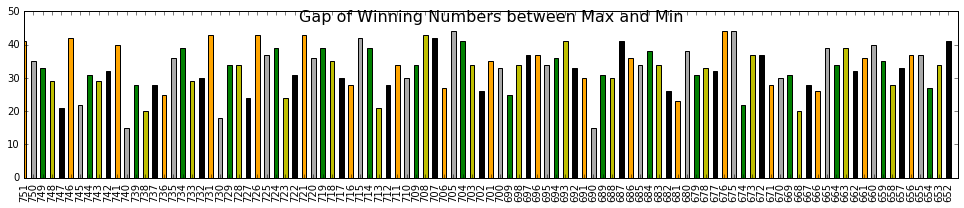

In [58]:
def Draw_SR_gap(SR_gap):
    # Make Graph
    from itertools import cycle, islice

    import matplotlib.pyplot as plt
    import matplotlib
    %matplotlib inline

    my_colors = list(islice(cycle(['orange', 'darkgrey', 'green', 'y', 'k']), None, len(SR_gap)))

    fig = plt.figure()
    plt.text(50, 47, 'Gap of Winning Numbers between Max and Min', horizontalalignment='center', fontsize=16)
    SR_gap[:100].plot(kind='bar', figsize=(13.5,3),  color=my_colors)
    plt.xlim(0,100)  # draw the latest 100 weeks gaps
    plt.ylim((0,50))
    plt.tight_layout()
    plt.show()
    fig.savefig('gap.png', dpi=fig.dpi)

Draw_SR_gap(SR_gap)


###  <font size=4 color="0066FF"> Draw_SR_cnt

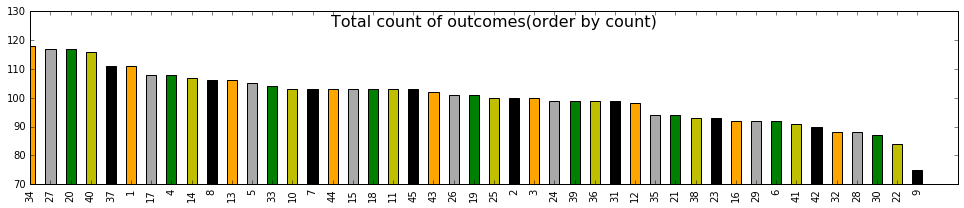

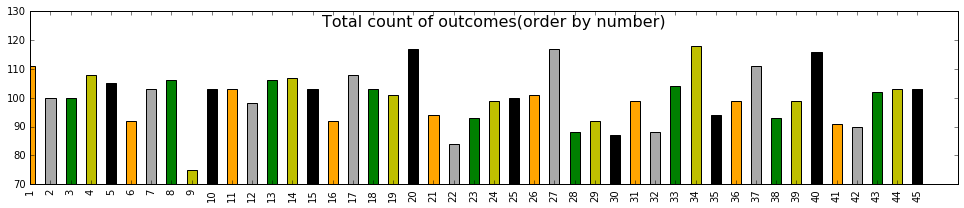

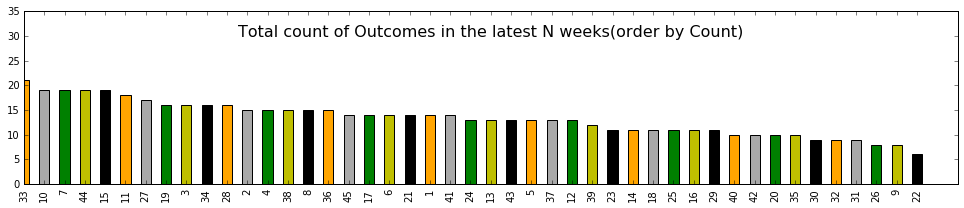

In [67]:
# Make Graph
def Draw_SR_cnt(SR_cnt, SR_Ncnt):
    from itertools import cycle, islice

    import matplotlib.pyplot as plt
    import matplotlib
    %matplotlib inline

    my_colors = list(islice(cycle(['orange', 'darkgrey', 'green', 'y', 'k']), None, len(SR_gap)))

    fig1 = plt.figure()
    #plt.suptitle('Total Count of Outcomes(order by frequency)', fontsize=12)
    plt.text(23,125,'Total count of outcomes(order by count)', horizontalalignment='center', fontsize=16)
    SR_cnt.sort_values(ascending=False).plot(kind='bar', figsize=(13.5,3),  color=my_colors)
    plt.xlim(0,46)
    plt.ylim((70,130))
    plt.tight_layout()
    plt.show()
    fig1.savefig('freq_orderby_freq.png',dpi=fig1.dpi)

    my_colors = list(islice(cycle(['orange', 'darkgrey', 'green', 'y', 'k']), None, len(SR_gap)))

    fig2 = plt.figure()
    #plt.suptitle('Total count of Outcomes(order by number)', fontsize=14)
    plt.text(23,125,'Total count of outcomes(order by number)', horizontalalignment='center', fontsize=16)
    SR_cnt.plot(kind='bar', figsize=(13.5,3),  color=my_colors)
    plt.xlim(0,46)
    plt.ylim((70,130))
    plt.tight_layout()
    plt.show()
    fig2.savefig('freq_1toN.png', dpi=fig2.dpi)

    fig3 = plt.figure()
    plt.text(23,30,'Total count of Outcomes in the latest N weeks(order by Count)', horizontalalignment='center', fontsize=16)
    SR_Ncnt.sort_values(ascending=False).plot(kind='bar', figsize=(13.5,3),  color=my_colors)
    plt.xlim(0,46)
    plt.ylim((0,35))
    plt.tight_layout()
    plt.show()
    fig3.savefig('freqN_orderby_freq.png',dpi=fig1.dpi)

    
    
    
Draw_SR_cnt(SR_cnt, SR_Ncnt)


### <font size=4 color="0066FF"> Generate Recommended Random Numbers
<img src="http://www.clipular.com/c/6439734118449152.png?k=qCNEMuoYOyLto0_QL68eWVG46zk">

In [75]:
def Gen_RC1(SR_cnt, SR_Ncnt):
    top6 = SR_cnt.sort_values(ascending=False)[:7].index.tolist()
    top6N = SR_Ncnt.sort_values(ascending=False)[:7].index.tolist()
    return sorted(top6), sorted(top6N)

top6, top6N = Gen_RC1(SR_cnt, SR_Ncnt)   
print 'Recommended List RC1-1 (Most Selected Top 6 Numbers)', top6
print 'Recommended List RC1-2 (Most Selected Top 6 Numbers in the last N weeks)', top6N

Recommended List RC1-1 (Most Selected Top 6 Numbers) [1, 17, 20, 27, 34, 37, 40]
Recommended List RC1-2 (Most Selected Top 6 Numbers in the last N weeks) [7, 10, 11, 15, 27, 33, 44]


In [111]:
def Gen_RC2(SR_cnt, selected):
    import random
    RC2 = []
    rlist = []
    cond_val = SR_cnt.mean(0)
    for i, v in SR_cnt.iteritems():
        if v > cond_val:
            rlist.append(i)
    print 'Candidates Numbers', len(rlist)
    print 'Candidates List', rlist
    for i in range(5):
        rclist = random.sample(rlist, 6)
        for v in rclist:
            selected[v] = 1
        RC2.append(sorted(rclist))
    return RC2

selected = Series(0, index=range(1,46))
RC2 = Gen_RC2(SR_cnt, selected)
for i in range(len(RC2)):
    print RC2[i]
for i,v in selected.iteritems():
    if v == 1:
        print i,
print ''

Candidates Numbers 23
Candidates List [1, 4, 5, 7, 8, 10, 11, 13, 14, 15, 17, 18, 19, 20, 26, 27, 33, 34, 37, 40, 43, 44, 45]
[1, 11, 27, 34, 43, 45]
[1, 7, 15, 19, 33, 45]
[1, 14, 15, 17, 20, 40]
[4, 11, 17, 26, 33, 43]
[5, 8, 10, 15, 27, 40]
1 4 5 7 8 10 11 14 15 17 19 20 26 27 33 34 40 43 45 


In [113]:
def Gen_RC3(SR_cnt, selected):
    import random
    RC3 = []
    rlist = []
    cond_val = SR_cnt.mean(0)
    for i, v in SR_cnt.iteritems():
        if v < cond_val:
            rlist.append(i)
    print 'Candidates Numbers', len(rlist)
    print 'Candidates List', rlist
    for i in range(5):
        rclist = random.sample(rlist, 6)
        for v in rclist:
            selected[v] = 1
        RC3.append(sorted(rclist))
    return RC3

RC3 = Gen_RC3(SR_cnt, selected)
for i in range(len(RC3)):
    print RC3[i]
for i,v in selected.iteritems():
    if v == 1:
        print i,
print ''

Candidates Numbers 22
Candidates List [2, 3, 6, 9, 12, 16, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 35, 36, 38, 39, 41, 42]
[2, 3, 16, 23, 24, 39]
[2, 12, 22, 23, 35, 41]
[6, 9, 16, 32, 36, 41]
[12, 23, 29, 35, 36, 42]
[3, 9, 22, 24, 31, 32]
1 2 3 4 5 6 7 8 9 10 11 12 14 15 16 17 19 20 22 23 24 26 27 29 31 32 33 34 35 36 39 40 41 42 43 45 


In [116]:
def Gen_RC4(selected):
    import random
    RC4 = []
    rlist = []
    for i,v in selected.iteritems():
        if v == 0:
            rlist.append(i)
    
    for i in range(5):
        rclist = random.sample(rlist, 6)
        RC4.append(sorted(rclist))
    return RC4

for i,v in selected.iteritems():
    if v == 0: 
        print i,
print ''
RC4 = Gen_RC4(selected)
for i in range(len(RC4)):
    print RC4[i]

13 18 21 25 28 30 37 38 44 
[18, 21, 25, 28, 30, 37]
[13, 18, 28, 30, 37, 38]
[13, 18, 25, 37, 38, 44]
[13, 21, 28, 30, 37, 38]
[13, 21, 25, 28, 30, 38]
